# **Previsão de volume de água em reservatório com dados ONS**

In [85]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import pandas as pd
import os
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

Obtendo dados ENA:

In [87]:
years = range(2020, 2026)
dfs = []

for year in years:
    url = f"https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/ena_reservatorio_di/ENA_DIARIO_RESERVATORIOS_{year}.csv"
    df = pd.read_csv(
        url,
        sep=';',
        parse_dates=["ena_data"],
        usecols=["ena_data", "nom_reservatorio", "ena_armazenavel_res_mwmed"]
    )
    dfs.append(df)

ena_df = pd.concat(dfs)

In [88]:
ena_df.info()
ena_df

<class 'pandas.core.frame.DataFrame'>
Index: 318788 entries, 0 to 41230
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   nom_reservatorio           318788 non-null  object        
 1   ena_data                   318788 non-null  datetime64[ns]
 2   ena_armazenavel_res_mwmed  315296 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.7+ MB


,nom_reservatorio,ena_data,ena_armazenavel_res_mwmed
0,14 DE JULHO,2020-01-01,10.471
1,A. VERMELHA,2020-01-01,809.563
2,AIMORES,2020-01-01,69.978
3,B. BONITA,2020-01-01,22.535
4,B.COQUEIROS,2020-01-01,51.742
...,...,...,...
41226,TRÊS IRMÃOS,2025-09-23,75.152
41227,TRÊS MARIAS,2025-09-23,31.302
41228,TUCURUI,2025-09-23,654.205
41229,VOLTA GRANDE,2025-09-23,73.260


Obtendo dados sobre produtividade específica dos reservatórios:

In [89]:
res_url = f" https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/reservatorio/RESERVATORIOS.csv"

res_df = pd.read_csv(
    res_url,
    sep=";",
    usecols=["nom_reservatorio", "val_produtibilidadeespecifica"]
)

In [90]:
res_df.info()
res_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nom_reservatorio               162 non-null    object 
 1   val_produtibilidadeespecifica  160 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


,nom_reservatorio,val_produtibilidadeespecifica
0,14 DE JULHO,0.008927
1,A. VERMELHA,0.008825
2,AIMORES,0.008926
3,ANTA,NaN
4,APOLONIO SALES,0.008973
...,...,...
157,TRÊS IRMÃOS,0.008846
158,TRÊS MARIAS,0.008717
159,TUCURUI,0.009060
160,VOLTA GRANDE,0.008996


Unindo dados ENA aos de Reservatorios:

In [91]:
merged_df = pd.merge(
    ena_df,
    res_df,
    on="nom_reservatorio",
    how="inner"
)

merged_df = merged_df.set_index("ena_data")

In [92]:
merged_df.info()
merged_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 323872 entries, 2020-01-01 to 2025-09-23
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   nom_reservatorio               323872 non-null  object 
 1   ena_armazenavel_res_mwmed      320380 non-null  float64
 2   val_produtibilidadeespecifica  322767 non-null  float64
dtypes: float64(2), object(1)
memory usage: 9.9+ MB


,nom_reservatorio,ena_armazenavel_res_mwmed,val_produtibilidadeespecifica
ena_data,,,
2020-01-01,14 DE JULHO,10.471,0.008927
2020-01-01,A. VERMELHA,809.563,0.008825
2020-01-01,AIMORES,69.978,0.008926
2020-01-01,B. BONITA,22.535,0.008845
2020-01-01,B.COQUEIROS,51.742,0.008934
...,...,...,...
2025-09-23,TRÊS IRMÃOS,75.152,0.008846
2025-09-23,TRÊS MARIAS,31.302,0.008717
2025-09-23,TUCURUI,654.205,0.009060


Tirando linhas com NaN:

In [93]:
clean_merged_df = merged_df.dropna(subset=['ena_armazenavel_res_mwmed']).copy()

clean_merged_df

,nom_reservatorio,ena_armazenavel_res_mwmed,val_produtibilidadeespecifica
ena_data,,,
2020-01-01,14 DE JULHO,10.471,0.008927
2020-01-01,A. VERMELHA,809.563,0.008825
2020-01-01,AIMORES,69.978,0.008926
2020-01-01,B. BONITA,22.535,0.008845
2020-01-01,B.COQUEIROS,51.742,0.008934
...,...,...,...
2025-09-23,TRÊS IRMÃOS,75.152,0.008846
2025-09-23,TRÊS MARIAS,31.302,0.008717
2025-09-23,TUCURUI,654.205,0.009060


A ENA (Energia Natural Afluente) é uma medida de quanta energia elétrica a água do reservatório pode gerar, expressa em MWmed (megawatts médios). A produtividade específica é o fator de conversão que indica a eficiência dessa água, ou seja, quanta energia cada unidade de volume de água pode produzir.

Portanto, a divisão de ENA por produtividade específica converte a medida de energia potencial de volta para a sua medida de origem, que é o volume de água. Dessa forma, calculamos `clean_merged_df['ena_armazenavel_res_mwmed'] / clean_merged_df['val_produtibilidadeespecifica']` para obter a nossa coluna 'target'.

In [94]:
clean_merged_df['vol_agua'] = clean_merged_df['ena_armazenavel_res_mwmed'] / clean_merged_df['val_produtibilidadeespecifica']

clean_merged_df

,nom_reservatorio,ena_armazenavel_res_mwmed,val_produtibilidadeespecifica,vol_agua
ena_data,,,,
2020-01-01,14 DE JULHO,10.471,0.008927,1172.958441
2020-01-01,A. VERMELHA,809.563,0.008825,91735.184136
2020-01-01,AIMORES,69.978,0.008926,7839.793861
2020-01-01,B. BONITA,22.535,0.008845,2547.767100
2020-01-01,B.COQUEIROS,51.742,0.008934,5791.582718
...,...,...,...,...
2025-09-23,TRÊS IRMÃOS,75.152,0.008846,8495.591228
2025-09-23,TRÊS MARIAS,31.302,0.008717,3590.914305
2025-09-23,TUCURUI,654.205,0.009060,72208.057395


Excluindo colunas dispensáveis:

In [95]:
clean_merged_df = clean_merged_df.drop(columns=['ena_armazenavel_res_mwmed', 'val_produtibilidadeespecifica'])

clean_merged_df

,nom_reservatorio,vol_agua
ena_data,,
2020-01-01,14 DE JULHO,1172.958441
2020-01-01,A. VERMELHA,91735.184136
2020-01-01,AIMORES,7839.793861
2020-01-01,B. BONITA,2547.767100
2020-01-01,B.COQUEIROS,5791.582718
...,...,...
2025-09-23,TRÊS IRMÃOS,8495.591228
2025-09-23,TRÊS MARIAS,3590.914305
2025-09-23,TUCURUI,72208.057395


Plotando séries para todos os reservatórios para escolher um para análise:

In [97]:
import shutil

shutil.rmtree("plots", ignore_errors=True)

plt.style.use('seaborn-v0_8-whitegrid')

os.makedirs("plots", exist_ok=True)

reservoirs = clean_merged_df['nom_reservatorio'].unique()

for res in reservoirs:
    reservoir_df = clean_merged_df[clean_merged_df['nom_reservatorio'] == res].copy()

    reservoir_df = reservoir_df.reset_index()

    plt.figure(figsize=(15, 8))

    plt.plot(reservoir_df['ena_data'], reservoir_df['vol_agua'], alpha=0.8)

    plt.title(f'Evolução do Volume de Água do Reservatório {res}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Volume de Água (m³)', fontsize=12)

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    fname = f"plots/{res.replace(' ', '_').replace('/', '_')}.png"
    plt.savefig(fname, dpi=300, bbox_inches="tight")
    plt.close()

print("Gráficos salvos na pasta 'plots/'")

Gráficos salvos na pasta 'plots/'


# Estudo e Previsão para Reservatório P. Afonso 4

Notícias para ajudar a interpretar a série:

https://www.folhasertaneja.com.br/noticias/colunistas/601685

https://www.ctrestv.com.br/cvnews/situa%C3%A7%C3%A3o-atual-da-bacia-do-rio-s%C3%A3o-francisco%3A-desafios-e-condi%C3%A7%C3%B5es-em-2024-

Criando dataframe só com dados do reservatório P. Afonso 4:

In [98]:
p_afonso_4_df = clean_merged_df.loc[clean_merged_df['nom_reservatorio'] == 'P. AFONSO 4'].copy()

p_afonso_4_df = p_afonso_4_df.drop(columns=['nom_reservatorio'])

p_afonso_4_df

,vol_agua
ena_data,
2020-01-01,110324.125028
2020-01-02,110151.441779
2020-01-03,109957.957297
2020-01-04,110278.120185
2020-01-05,111236.187541
...,...
2025-09-19,26578.472375
2025-09-20,25718.798151
2025-09-21,25563.174114


Defidindo conjuntos de treino e teste:

In [99]:
validation_start = p_afonso_4_df.index.max() - pd.DateOffset(years=1)

train = p_afonso_4_df.loc[p_afonso_4_df.index < validation_start]
validation = p_afonso_4_df.loc[p_afonso_4_df.index >= validation_start]

print("Divisão dos dados:")
print(f"Conjunto de Treino: {len(train)} registros, de {train.index.min().date()} a {train.index.max().date()}")
print(f"Conjunto de Validação: {len(validation)} registros, de {validation.index.min().date()} a {validation.index.max().date()}")

Divisão dos dados:
Conjunto de Treino: 1727 registros, de 2020-01-01 a 2024-09-22
Conjunto de Validação: 366 registros, de 2024-09-23 a 2025-09-23


Plotando a série para visualizar divisão:

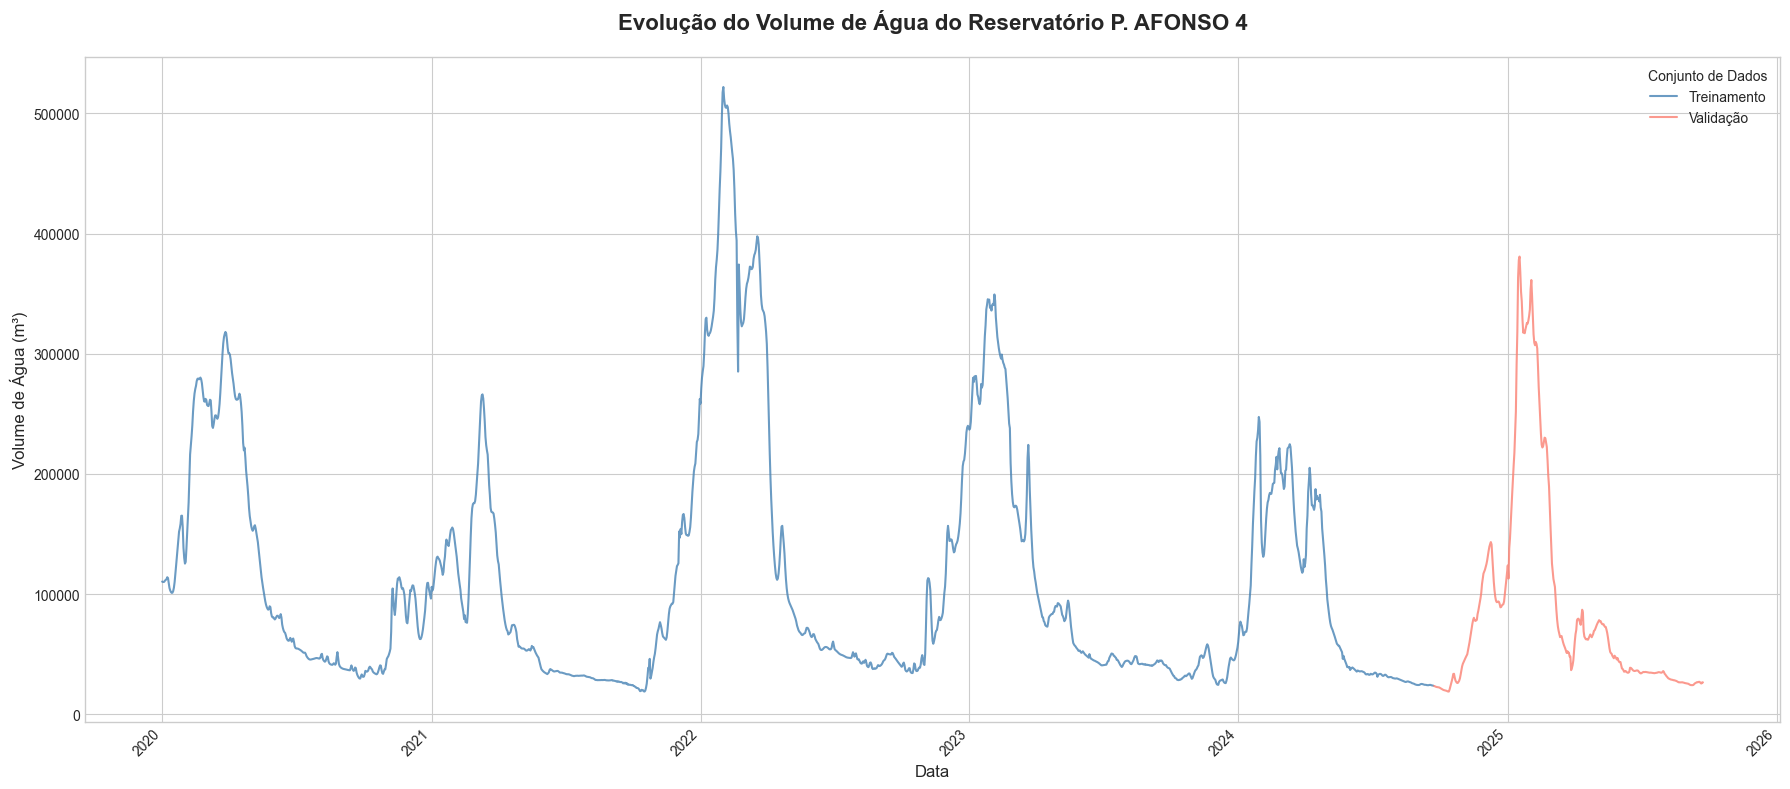

In [100]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(18, 8))

plt.plot(train['vol_agua'], label='Treinamento', color='steelblue', alpha=0.8)

plt.plot(validation['vol_agua'], label='Validação', color='salmon', alpha=0.8)

plt.title('Evolução do Volume de Água do Reservatório P. AFONSO 4', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume de Água (m³)', fontsize=12)

plt.legend(title='Conjunto de Dados')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

Análise de autocorrelação e autocorrelação parcial no conjunto de treinamento:

In [101]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


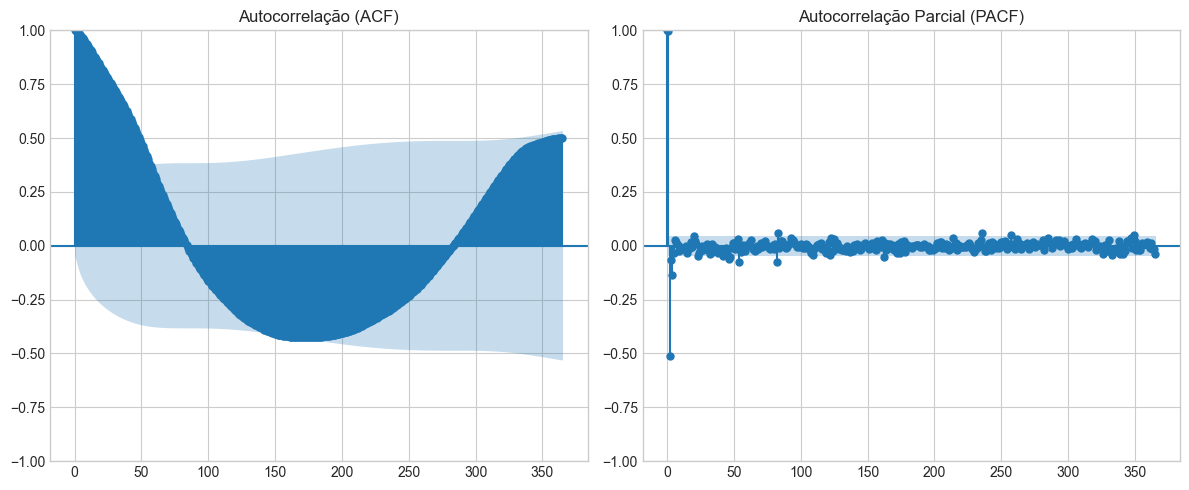

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(train['vol_agua'].dropna(), ax=plt.gca(), lags=365)
plt.title('Autocorrelação (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(train['vol_agua'].dropna(), ax=plt.gca(), lags=365)
plt.title('Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

Decomposição da série (treinamento):

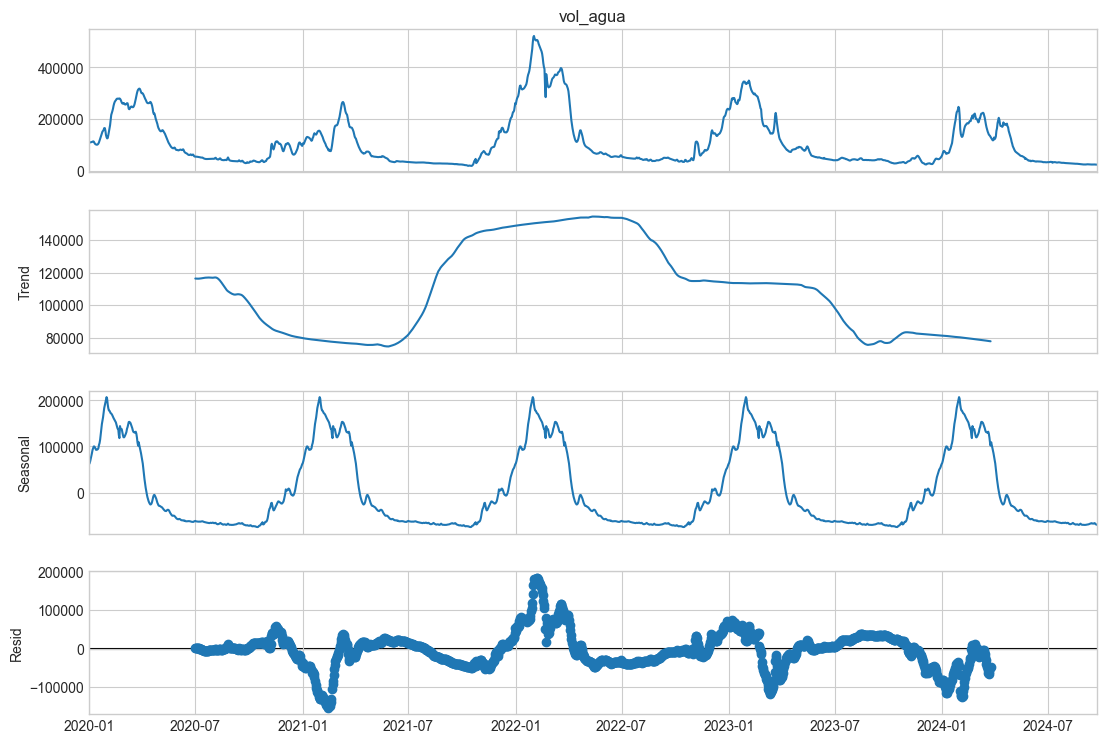

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train['vol_agua'], model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

Teste de de Dickey-Fuller na série do conjunto de treinamento:

In [104]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train['vol_agua'].dropna())

print('Estatísticas do Teste ADF:')
print(f'Estatística de Teste: {result[0]}')
print(f'Valor-p: {result[1]}')
print('Valores Críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] <= 0.05:
    print("\nA série é estacionária (o valor-p é menor ou igual a 0.05).")
else:
    print("\nA série NÃO é estacionária (o valor-p é maior que 0.05).")

Estatísticas do Teste ADF:
Estatística de Teste: -2.9390958242012033
Valor-p: 0.04098692501063597
Valores Críticos:
	1%: -3.434150968697906
	5%: -2.8632189151648864
	10%: -2.567663807484617

A série é estacionária (o valor-p é menor ou igual a 0.05).


# Prophet

In [105]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
from prophet import Prophet

prophet_df = train[['vol_agua']].reset_index().copy()
prophet_df.rename(columns={'ena_data': 'ds', 'vol_agua': 'y'}, inplace=True)
prophet_df

prophet_object = Prophet()
prophet_object.fit(prophet_df)

future = prophet_object.make_future_dataframe(periods=len(validation), freq='D')

prediction = prophet_object.predict(future)

print(prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:19 - cmdstanpy - INFO - Chain [1] done processing


          ds           yhat    yhat_lower     yhat_upper
0 2020-01-01  126159.144555  73901.871364  176784.443181
1 2020-01-02  129107.666275  74030.518302  183920.576144
2 2020-01-03  132447.239914  78643.143628  186966.560079
3 2020-01-04  135519.222295  81233.608355  190077.500049
4 2020-01-05  138371.168758  85308.352828  192578.733226


Avaliação do Prophet:

MAE: 39471.32
RMSE: 59033.52
MAPE: 58.02%
Acurácia: 41.98%


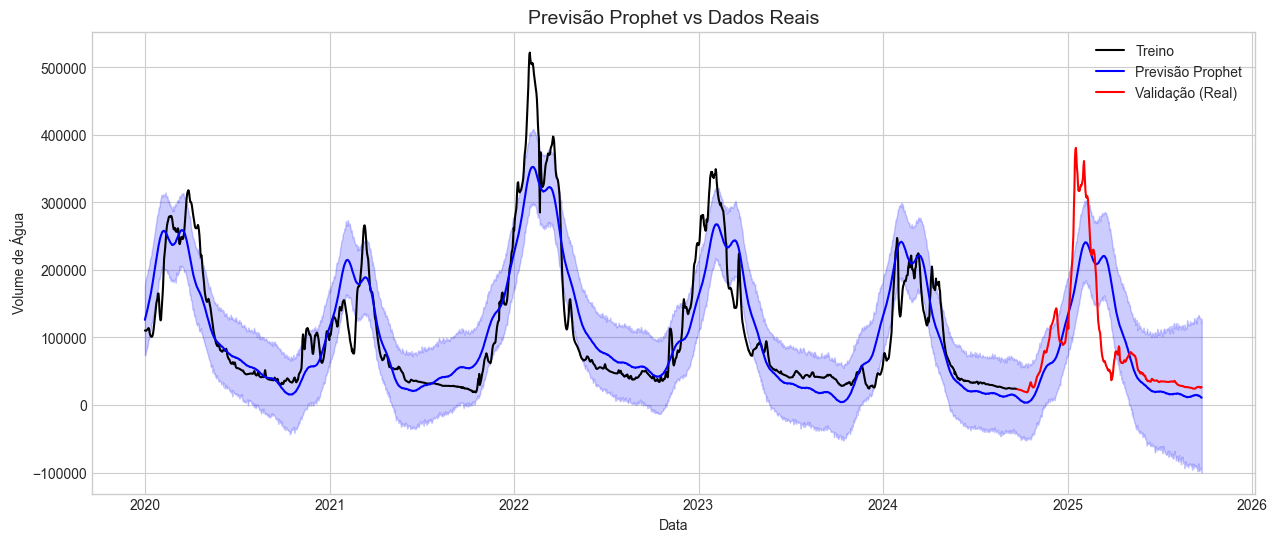

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

forecast_validation = prediction.set_index('ds').loc[validation.index]

mae = mean_absolute_error(validation['vol_agua'], forecast_validation['yhat'])
rmse = np.sqrt(mean_squared_error(validation['vol_agua'], forecast_validation['yhat']))

mape = np.mean(np.abs((validation['vol_agua'] - forecast_validation['yhat']) / validation['vol_agua'])) * 100
accuracy = 100 - mape

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Acurácia: {accuracy:.2f}%")

plt.figure(figsize=(15,6))

plt.plot(prophet_df['ds'], prophet_df['y'], label='Treino', color='black')

plt.plot(prediction['ds'], prediction['yhat'], label='Previsão Prophet', color='blue')

plt.fill_between(
    prediction['ds'],
    prediction['yhat_lower'],
    prediction['yhat_upper'],
    color='blue', alpha=0.2
)

plt.plot(validation.index, validation['vol_agua'], label='Validação (Real)', color='red')

plt.title("Previsão Prophet vs Dados Reais", fontsize=14)
plt.xlabel("Data")
plt.ylabel("Volume de Água")
plt.legend()
plt.grid(True)
plt.show()


Plotando com a biblioteca do prophet:

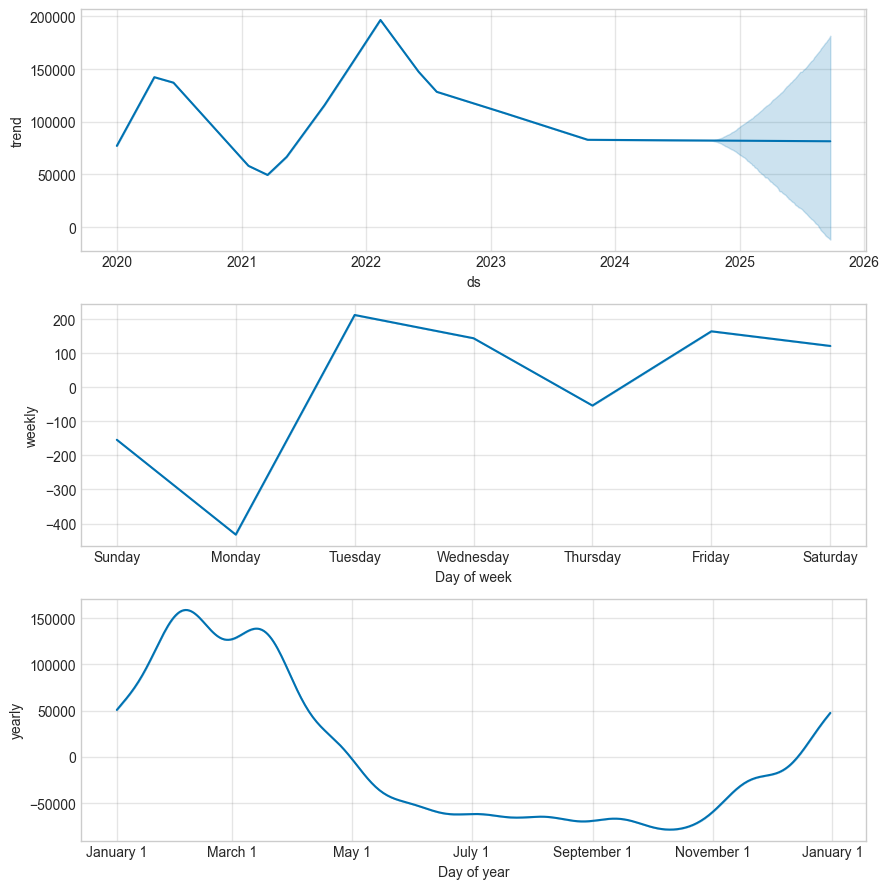

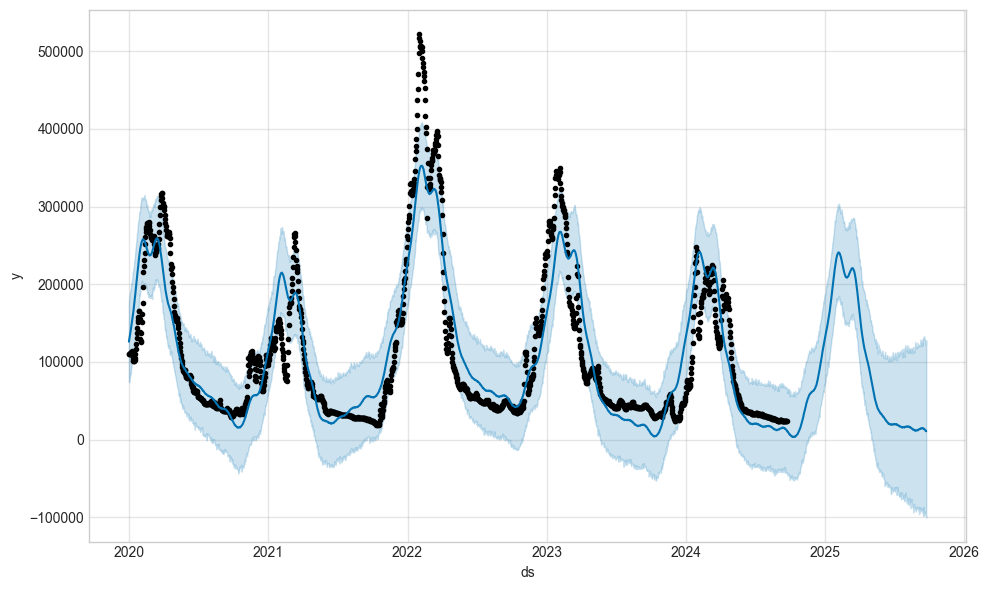

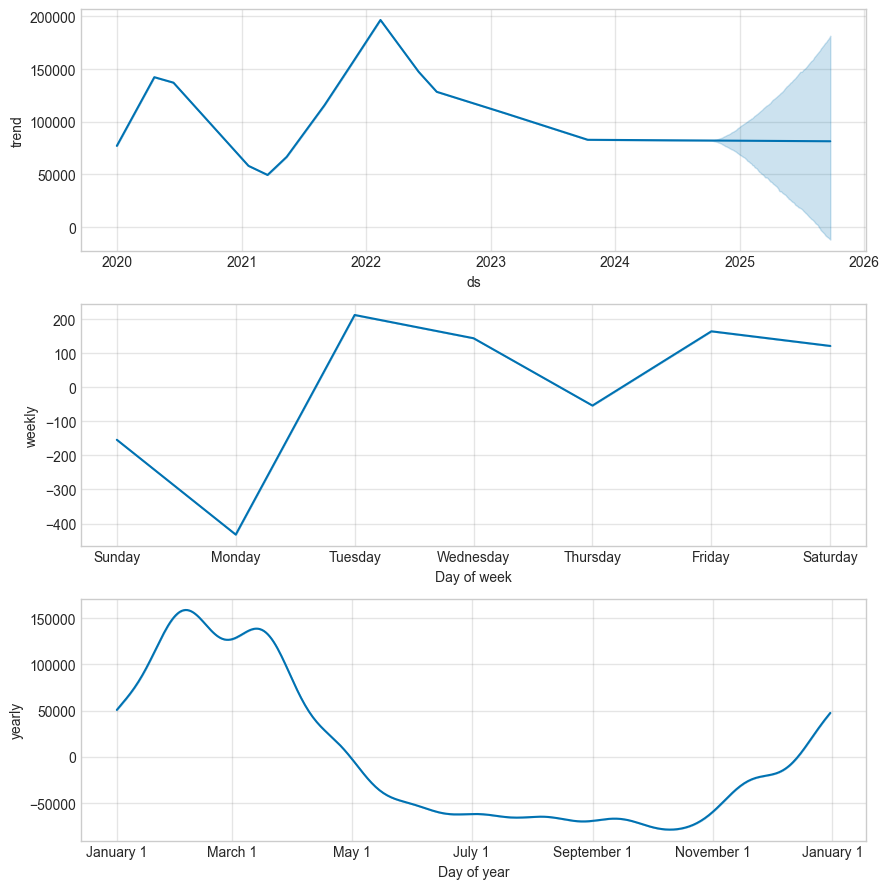

In [108]:
prophet_object.plot(prediction)
prophet_object.plot_components(prediction)

# LSTM:

Em vista da acurácia baixíssima encontrada com o Prophet e à sua característica de suavização excessiva e pouca capacidade de se ater as nuances da série, foi realizado o treinamento com o LSTM (com o mesmo reservatório)

In [109]:
%pip install tensorflow
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Normalizando valores da variável target vol_agua:

In [111]:
train_data = train.copy()
train_data = train_data.sort_index()

scaler = MinMaxScaler()
train_data['vol_norm'] = scaler.fit_transform(train_data[['vol_agua']])
train
train_data

,vol_agua,vol_norm
ena_data,,
2020-01-01,110324.125028,0.181813
2020-01-02,110151.441779,0.181470
2020-01-03,109957.957297,0.181085
2020-01-04,110278.120185,0.181722
2020-01-05,111236.187541,0.183626
...,...,...
2024-09-18,24366.497600,0.010953
2024-09-19,24138.455451,0.010499
2024-09-20,23942.769794,0.010110


Normalizando valores de vol_agua no conjunto de teste também:

In [112]:
test_data = validation.copy()
lstm_df = test_data.sort_index()

test_data['vol_norm'] = scaler.transform(test_data[['vol_agua']])

In [113]:
def create_sequences(data, window_size=120):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size].values)
        y.append(data.iloc[i+window_size])
    return np.array(X), np.array(y)

In [114]:
window_size = 120
data = train_data['vol_norm'].values

X_train, y_train = create_sequences(train_data['vol_norm'], window_size)
X_val, y_val = create_sequences(test_data['vol_norm'], window_size)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

train_pred = scaler.inverse_transform(train_pred)
y_train_real = scaler.inverse_transform(y_train.reshape(-1, 1))

val_pred = scaler.inverse_transform(val_pred)
y_val_real = scaler.inverse_transform(y_val.reshape(-1, 1))

c:\Users\maris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0210 - val_loss: 0.0018
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0017 - val_loss: 8.4362e-04
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0013 - val_loss: 9.2462e-04
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0011 - val_loss: 7.8005e-04
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0013 - val_loss: 6.0578e-04
Epoch 9/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0012 - val_loss: 6.6426e-04
Epoch 10/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 9.4528e-04 - val_loss: 6.2249e-04
Epoch 11/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0010 - val_loss: 7.3384e-04
Epoch 12/30
51/51 ━━━━━━━━━━━━━

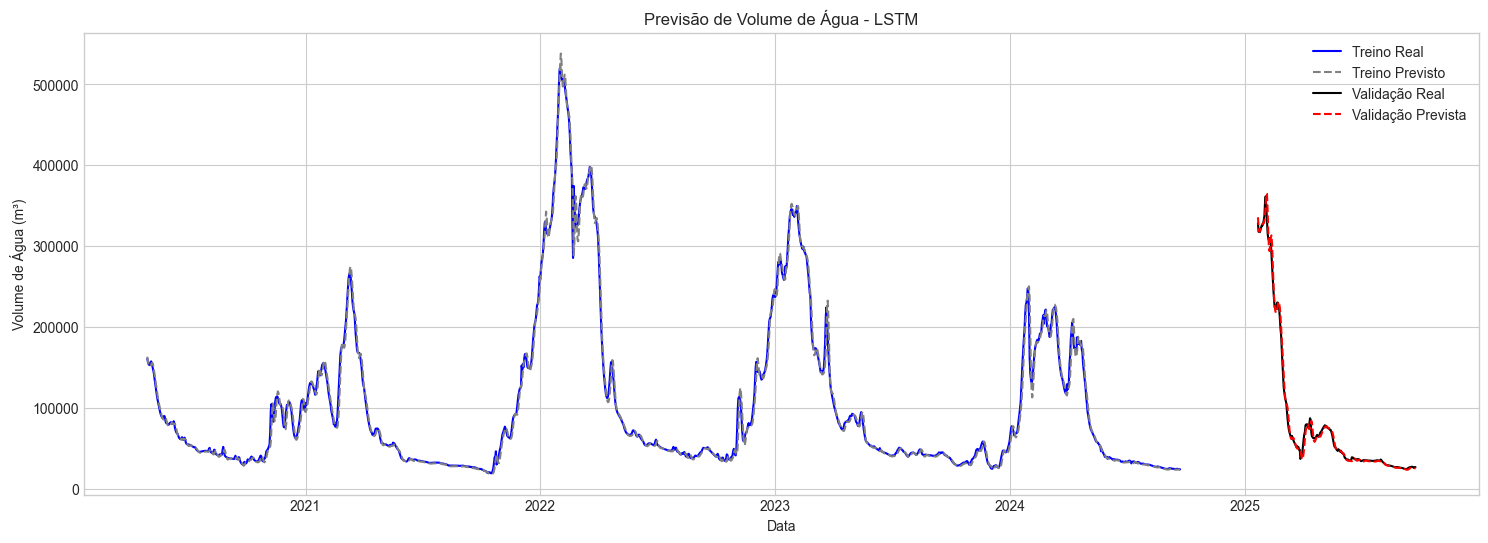

In [115]:
plt.figure(figsize=(18,6))

plt.plot(train_data.index[window_size:], y_train_real, label="Treino Real", color="blue")
plt.plot(train_data.index[window_size:], train_pred, label="Treino Previsto", color="grey", linestyle="--")

plt.plot(test_data.index[window_size:], y_val_real, label="Validação Real", color="black")
plt.plot(test_data.index[window_size:], val_pred, label="Validação Prevista", color="red", linestyle="--")

plt.title("Previsão de Volume de Água - LSTM")
plt.xlabel("Data")
plt.ylabel("Volume de Água (m³)")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

val_mae = mean_absolute_error(y_val_real, val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val_real, val_pred))
val_mape = np.mean(np.abs((y_val_real - val_pred) / y_val_real)) * 100
val_accuracy = 100 - val_mape

print("\n" + "="*50)
print("AVALIAÇÃO DO MODELO LSTM (VALIDAÇÃO)")
print("="*50)
print(f"MAE:  {val_mae:.2f} m³")
print(f"RMSE: {val_rmse:.2f} m³")
print(f"MAPE: {val_mape:.2f}%")
print(f"Acurácia: {val_accuracy:.2f}%")

print("\nComparação com Prophet:")
print(f"LSTM  - Acurácia: {val_accuracy:.2f}%")
print(f"Prophet - Acurácia: {accuracy:.2f}%")


AVALIAÇÃO DO MODELO LSTM (VALIDAÇÃO)
MAE:  3542.50 m³
RMSE: 6469.94 m³
MAPE: 4.19%
Acurácia: 95.81%

Comparação com Prophet:
LSTM  - Acurácia: 95.81%
Prophet - Acurácia: 41.98%


Salvando modelo (tanto pesos como arquitetura):

In [117]:
model.save('modelo_lstm_completo.keras')
print("Modelo LSTM completo salvo em 'modelo_lstm_completo.keras'")

Modelo LSTM completo salvo em 'modelo_lstm_completo.keras'
